In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


In [2]:
PREFIX     = "KS91_K562_ASTARRseq"
FOLDER     = "coverage_astarrseq_peak_macs_input"
REGIONS    = c("GATA1", "MYC", "FADS")
PREPROCESS = c("raw", "norm")

region  = REGIONS[1]
process = PREPROCESS[1]
fdiry = file.path(FD_RES, "results", PREFIX, FOLDER, "summary")


fname = "result.Log2FC.raw.WGS.tsv"
fpath = file.path(fdiry, fname)
print(fpath)
dat_log2fc_raw = read_tsv(fpath)

fname = "result.Log2FC.deseq.WGS.tsv"
fpath = file.path(fdiry, fname)
print(fpath)
dat_log2fc_deseq = read_tsv(fpath)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/KS91_K562_ASTARRseq/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.raw.WGS.tsv"


Rows: 246852 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Peak
dbl (5): Start, End, Input, Output, log2FoldChange

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/KS91_K562_ASTARRseq/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.deseq.WGS.tsv"


Rows: 246850 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Peak
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(dat_log2fc_raw)

Chrom,Start,End,Peak,Input,Output,log2FoldChange
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1_10015_10442,210.1667,8.50,-4.627927
chr1,14253,14645,chr1_14253_14645,135.8333,30.25,-2.166831
chr1,16015,16477,chr1_16015_16477,188.1667,14.75,-3.673224
chr1,17237,17772,chr1_17237_17772,345.8333,25.50,-3.761508
chr1,28903,29613,chr1_28903_29613,328.5000,16.25,-4.337382
chr1,30803,31072,chr1_30803_31072,120.6667,20.50,-2.557331


In [4]:
head(dat_log2fc_deseq)

Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_10015_10442,71.40375,-2.2136128,0.2691517,-8.2244061,1.961605e-16,2.910688e-15
chr1_14253_14645,68.63035,0.2221859,0.1534101,1.4483134,1.475294e-01,2.178106e-01
chr1_16015_16477,71.25409,-1.2712950,0.2019628,-6.2946978,3.079993e-10,2.653010e-09
chr1_17237_17772,124.03128,-1.3852891,0.1638628,-8.4539594,2.815873e-17,4.431893e-16
chr1_28903_29613,113.63103,-1.9422003,0.1886131,-10.2972733,7.248681e-25,1.723665e-23
chr1_30803_31072,57.37875,-0.1332069,0.2145692,-0.6208109,5.347240e-01,6.231400e-01


In [10]:
dat1 = dat_log2fc_raw %>% dplyr::rename(Log2FC_raw = log2FoldChange)
dat2 = dat_log2fc_deseq %>%
    dplyr::select(Peak, log2FoldChange) %>%
    dplyr::rename(Log2FC_deseq = log2FoldChange)
dat = left_join(dat1, dat2, by="Peak")
print(dim(dat))
head(dat)

[1] 246852      8


Chrom,Start,End,Peak,Input,Output,Log2FC_raw,Log2FC_deseq
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1_10015_10442,210.1667,8.50,-4.627927,-2.2136128
chr1,14253,14645,chr1_14253_14645,135.8333,30.25,-2.166831,0.2221859
chr1,16015,16477,chr1_16015_16477,188.1667,14.75,-3.673224,-1.2712950
chr1,17237,17772,chr1_17237_17772,345.8333,25.50,-3.761508,-1.3852891
chr1,28903,29613,chr1_28903_29613,328.5000,16.25,-4.337382,-1.9422003
chr1,30803,31072,chr1_30803_31072,120.6667,20.50,-2.557331,-0.1332069


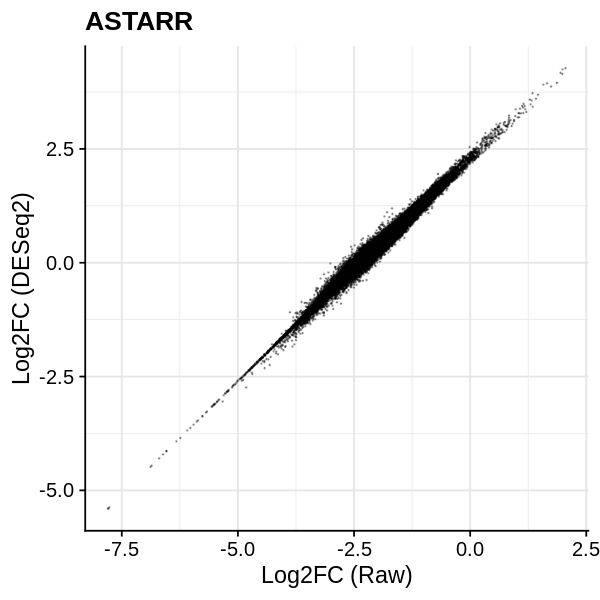

In [11]:
tmp = dat %>% na.omit %>% dplyr::slice_sample(n = 100000)
gpt = ggplot(tmp, aes(x=Log2FC_raw, y=Log2FC_deseq)) +
    geom_point(size=0.1, alpha=0.3) + 
    labs(x="Log2FC (Raw)", y="Log2FC (DESeq2)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)